In [2]:
!pip install -q tensorflow==2.2
!pip install -q keras==2.7.0
!pip install pillow
!pip install opencv-python
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import glob
import cv2
import os
import PIL.Image
from tensorflow import keras
print('TensorFlow Version: '+tf.version.VERSION)

!pip install tensorflow --upgrade
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
!pip install tf-nightly

from keras_preprocessing.image import ImageDataGenerator

     |████████████████████████████████| 46.0 MB 2.5 MB/s eta 0:00:011
TensorFlow Version: 2.2.0
  Using cached tensorflow-2.7.0-cp38-cp38-macosx_10_11_x86_64.whl (207.1 MB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached tensorflow_estimator-2.7.0-py2.py3-none-any.whl (463 kB)
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.2.2
    Uninstalling tensorboard-2.2.2:
      Successfully uninstalled tensorboard-2.2.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0


ERROR: Could not find a version that satisfies the requirement tensorflow-gpu
ERROR: No matching distribution found for tensorflow-gpu
     |████████████████████████████████| 213.5 MB 11 kB/s  eta 0:00:013  |▎                               | 1.7 MB 4.2 MB/s eta 0:00:51     |█▌                              | 9.8 MB 4.2 MB/s eta 0:00:49     |██                              | 12.9 MB 4.2 MB/s eta 0:00:49     |█████▍                          | 36.1 MB 19.6 MB/s eta 0:00:10
     |████████████████████████████████| 5.8 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 21.4 MB/s eta 0:00:01
     |████████████████████████████████| 462 kB 6.9 MB/s eta 0:00:01


Tested different versions of tensorflow, as some versions resulted in errors

In [3]:
import pandas as pd
from keras_preprocessing.image import img_to_array

def get_pathframe(path):
  filenames = os.listdir(path)
  file = []
  cat = []
  thepath = []
  for filename in filenames:
    category = filename.split('_')[0]
    ex = filename.split('.')[1]
    if ex=='xml':
        continue
    if ex=='DS_Store':
        continue
    else:
        if category == 'apple':
            cat.append(0)
            thepath.append(path+'/'+filename) #append path
            file.append(filename)
        elif category == 'banana':
            cat.append(1)
            thepath.append(path+'/'+filename)
            file.append(filename)
        elif category == 'orange':
            cat.append(2)
            thepath.append(path+'/'+filename)
            file.append(filename)
        else:
            cat.append(3)
            thepath.append(path+'/'+filename)
            file.append(filename)


  df = pd.DataFrame({
      'file': file,
      'category': cat,
      'thepath': thepath
  })
  return df

df = get_pathframe('train')
df.head()

,file,category,thepath
0,apple_75.jpg,0,train/apple_75.jpg
1,apple_61.jpg,0,train/apple_61.jpg
2,apple_49.jpg,0,train/apple_49.jpg
3,orange_3.jpg,2,train/orange_3.jpg
4,orange_28.jpg,2,train/orange_28.jpg


In [4]:
size = 64

from keras_preprocessing import image

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [size, size])
    image /=255.0
    return image

In [5]:
def convert_to_tensor(df):
    path_ds = tf.data.Dataset.from_tensor_slices(df['thepath']) #creates a dataset with 
    image_ds = path_ds.map(load_and_preprocess_image)
    onehot_label=tf.one_hot(tf.cast(df['category'], tf.int64),4)
    label_ds = tf.data.Dataset.from_tensor_slices(onehot_label)
    
    return image_ds, label_ds

In [6]:
X, Y = convert_to_tensor(df)
X

<MapDataset shapes: (64, 64, 3), types: tf.float32>

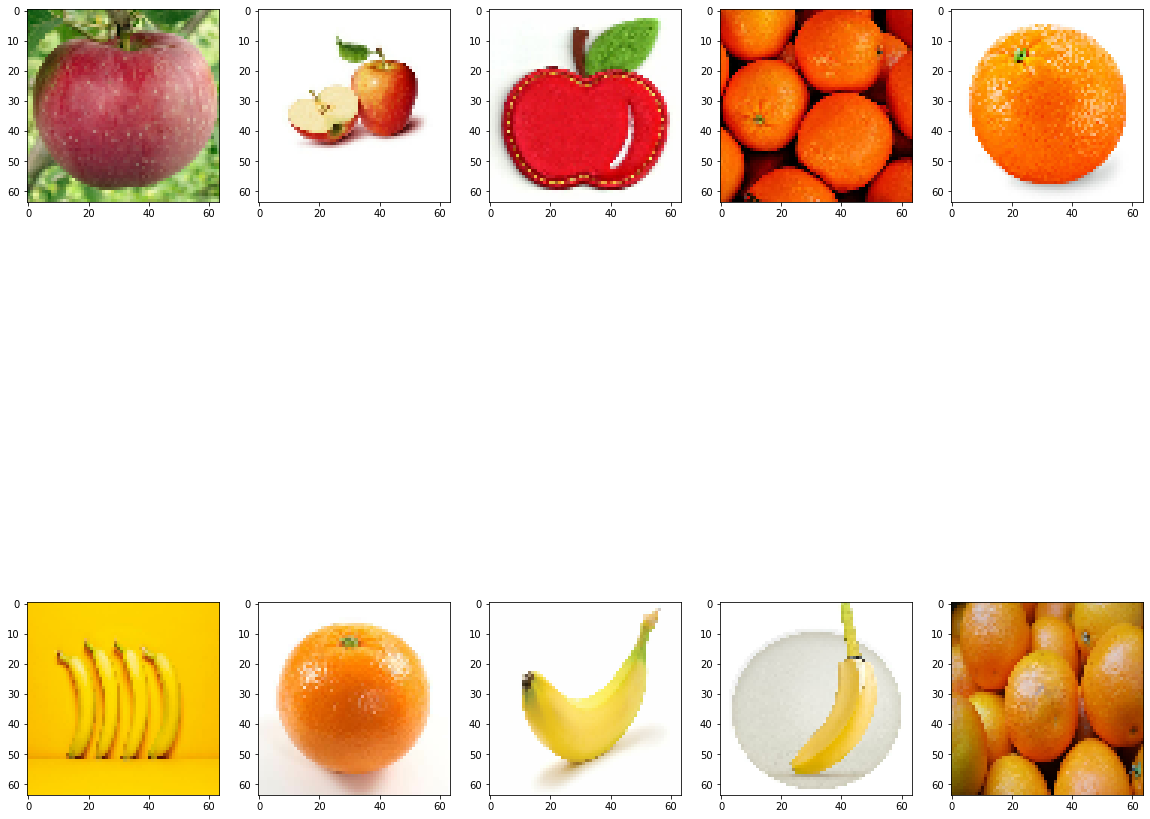

In [7]:
def plotimages(imagesls):
  fig, axes = plt.subplots(2, 5, figsize=(20, 20))
  axes = axes.flatten()
  for image, ax in zip(imagesls, axes):
    ax.imshow(image)
    ax.axis('on')


imagesls = []
for n, image in enumerate(X.take(10)):
  imagesls.append(image)

plotimages(imagesls)

In [169]:
train_data = tf.data.Dataset.zip((X,Y)).shuffle(buffer_size=20).batch(32)

In [164]:
df2 = get_pathframe('test')
df2.head()

,file,category,thepath
0,banana_78.jpg,1,test/banana_78.jpg
1,banana_93.jpg,1,test/banana_93.jpg
2,banana_87.jpg,1,test/banana_87.jpg
3,banana_86.jpg,1,test/banana_86.jpg
4,banana_92.jpg,1,test/banana_92.jpg


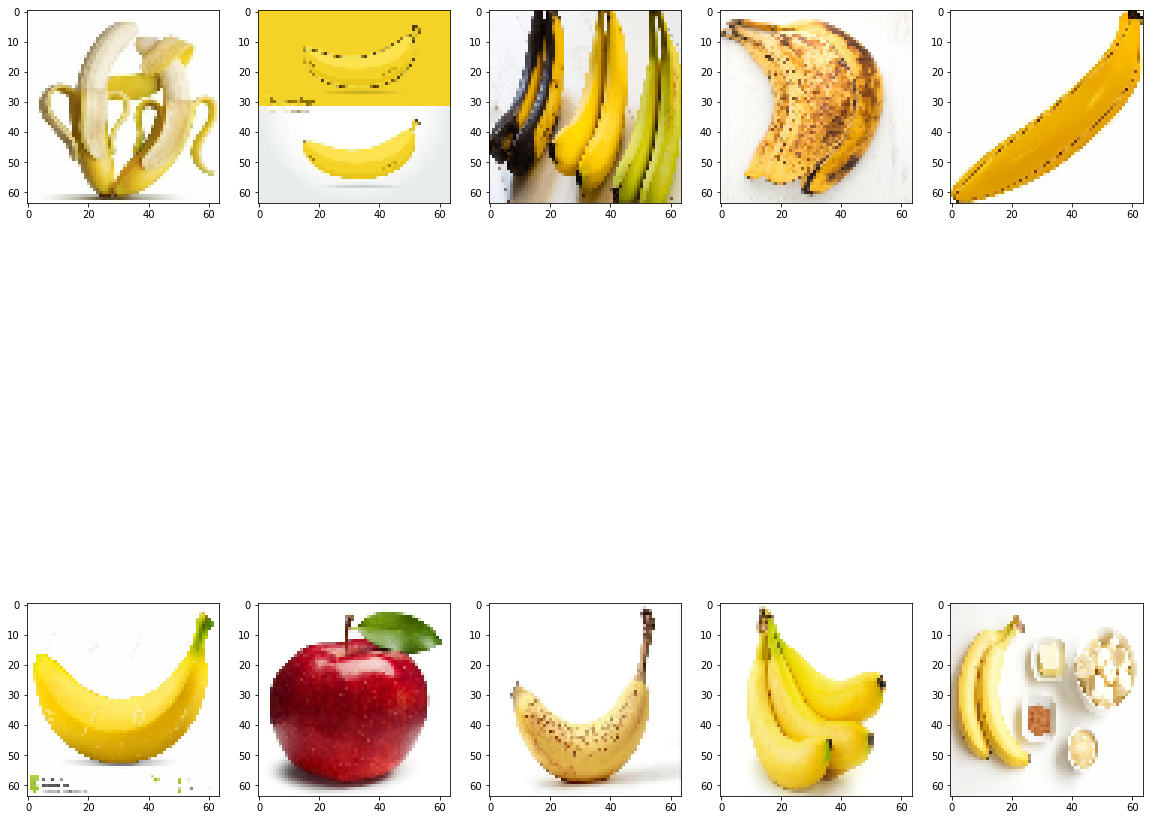

In [168]:
X1, Y1 = convert_to_tensor(df2)

distest = []
for n, image in enumerate(X1.take(10)):
    distest.append(image)
plotimages(distest)

In [170]:
test_data = tf.data.Dataset.zip((X1,Y1)).batch(32)

In [3]:

train_img = [cv2.imread(file) for file in glob.glob("train/*.jpg")]

totalwidth = np.array([])
totalheight = np.array([])

x = np.array([])

for img in glob.glob("train/*.jpg"):
    train_img = cv2.imread(img)
    width = train_img.shape[0]
    height = train_img.shape[1]
    totalwidth = np.append(totalwidth, width)
    totalheight = np.append(totalheight, height)
    
#     width, height = img2.size
#     totalwidth.append(width)
#     totalheight.append(height)

# comwidth = np.median(totalwidth)
# comheight = np.median(totalheight)

print("Median Width: " + str(np.mean(totalwidth)))
print("Median Height: " + str(np.mean(totalheight)))
print("Lowest Width: " + str(np.min(totalwidth)))
print("Lowest Height: " + str(np.min(totalheight)))

Median Width: 633.5083333333333
Median Height: 789.2166666666667
Lowest Width: 160.0
Lowest Height: 166.0


Text(0.5,1,'Height')

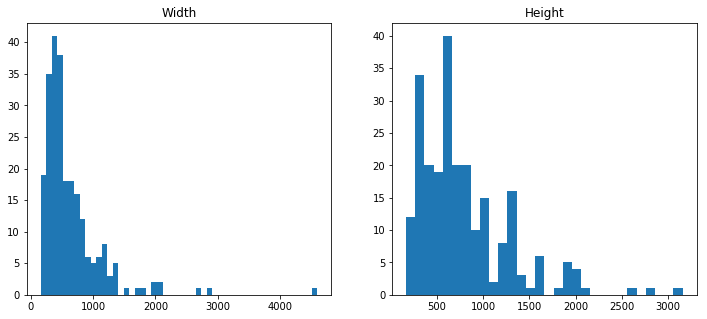

In [4]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax[0].hist(totalwidth, bins = 50)
ax[0].set_title('Width')

ax[1].hist(totalheight, bins = 30)
ax[1].set_title('Height')


In [5]:
train_path = 'train'
pad = 20


# apple_raw = Image.open(train_path + '/apple_5.jpg')
# apple_array = np.array(apple_raw)
# newapple_array = apple_array[0:,0:, 0:3]
# #newapple_array
# #for i in range(apple_array[i]):
# #    apple_array[i]
# apple_img = Image.fromarray(newapple_array)
# apple_resize11 = apple_img.resize((500,640))
# apple_resize11
#print(newapple_array)

<h5>Trying to resize all image files ending with .jpg using arrays</h5>

In [6]:

apple_train = None
size = 64

def index_in_list(a_list, index):
    return (index < len(a_list))

for i in range(1,77):
    if i == 34:
        continue
    else:
        apple_raw = PIL.Image.open(train_path + '/apple_{0}.jpg'.format(i))
        apple_raw = apple_raw.convert('RGB')
        apple_array = np.array(apple_raw)
#         if(apple_array.ndim == 3):
#             newapple_array = apple_array[0:,0:, 0:3]
            
        #x_batch = aug.flow(apple_raw, batch_size=1)
        
        apple_resize = apple_raw.resize((size,size))
        
        
        
        
        
    if apple_train is None:
            
        apple_train = apple_resize
    else:
        apple_train = np.concatenate((apple_train, apple_resize))


#apple_raw = apple.raw.convert('RGB')
# for i in range(1,76):
#     if i == 34:
#         continue
#     else:
#          if apple_train is None:
#                 apple_raw = apple_raw
#             else:
#                 apple_train = np.concatenate((apple_train, apple_resize))



apple_train = apple_train.reshape(-1,size, size, 3)

print(apple_train.ndim)
apple_train[0].shape

/Users/joshualeow/anaconda3/envs/PythonEx/lib/python3.6/site-packages/PIL/Image.py:976: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


4


(64, 64, 3)

(64, 64, 3)

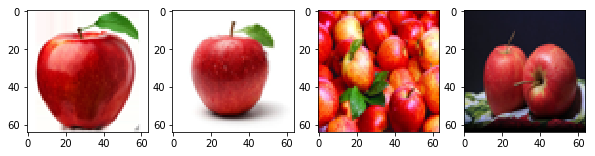

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,5))

ax[0].imshow(apple_train[0])
ax[1].imshow(apple_train[1])
ax[2].imshow(apple_train[2])
ax[3].imshow(apple_train[20])
apple_train[1].shape

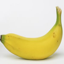

In [8]:

banana_train = None

def index_in_list(a_list, index):
    return (index < len(a_list))

for i in range(1,77):
    if i == 15:
        continue
    elif i == 18:
        continue
    elif i == 19:
        continue
    else:
        banana_raw = PIL.Image.open(train_path + '/banana_{0}.jpg'.format(i))
        banana_raw = banana_raw.convert('RGB')
        banana_array = np.array(banana_raw)
#         if(apple_array.ndim == 3):
#             newapple_array = apple_array[0:,0:, 0:3]
#             apple_raw = Image.fromarray(newapple_array)
            
        banana_resize = banana_raw.resize((size,size))
        

        
    if banana_train is None:
            
        banana_train = banana_resize
    else:
        banana_train = np.concatenate((banana_train, banana_resize))


#apple_raw = apple.raw.convert('RGB')
# for i in range(1,76):
#     if i == 34:
#         continue
#     else:
#          if apple_train is None:
#                 apple_raw = apple_raw
#             else:
#                 apple_train = np.concatenate((apple_train, apple_resize))

banana_train = banana_train.reshape(-1, size, size, 3)

banana_resize

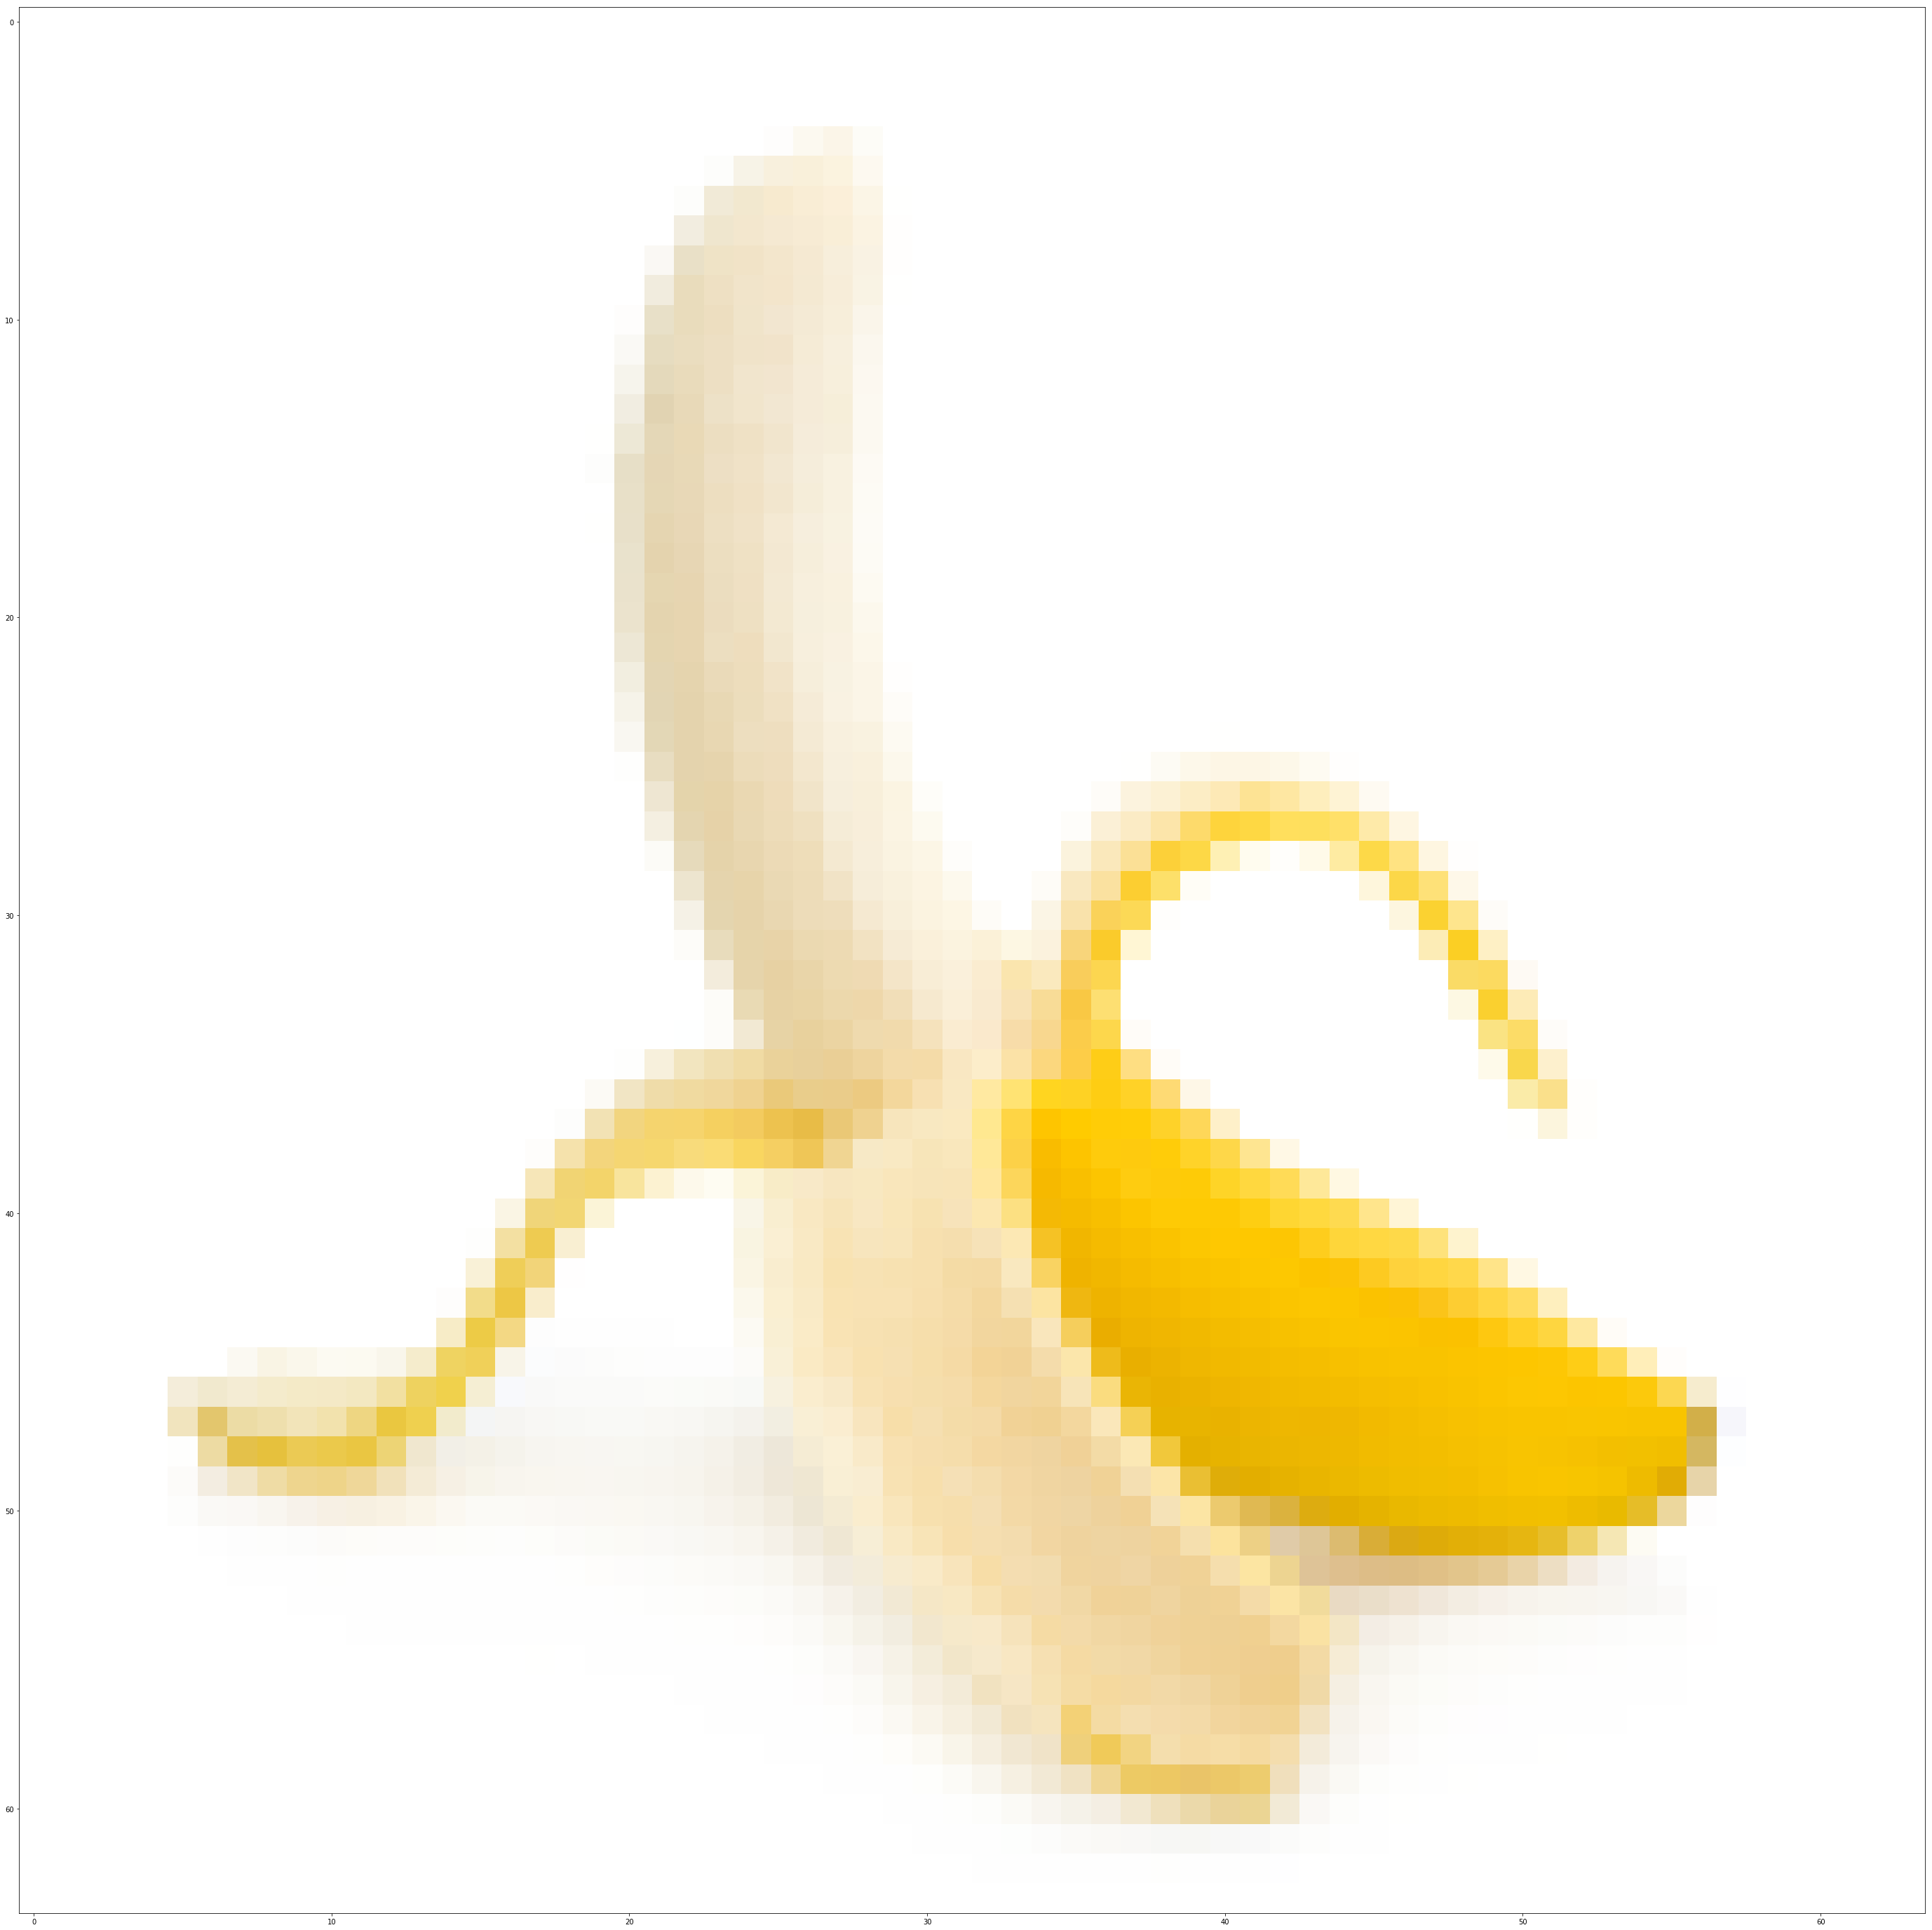

In [9]:
img2 = Image.fromarray(banana_train[1])

plt.subplots(figsize=(50,50))
plt.imshow(img2)


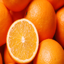

In [10]:

orange_train = None

def index_in_list(a_list, index):
    return (index < len(a_list))

for i in range(1,77):
    if i == 39:
        continue
    elif i == 45:
        continue
    elif i == 65:
        continue
    elif i == 66:
        continue
    else:
        orange_raw = PIL.Image.open(train_path + '/orange_{0}.jpg'.format(i))
        orange_raw = orange_raw.convert('RGB')
        orange_array = np.array(orange_raw)
#         if(apple_array.ndim == 3):
#             newapple_array = apple_array[0:,0:, 0:3]
#             apple_raw = Image.fromarray(newapple_array)
            
        orange_resize = orange_raw.resize((size,size))
        

        
    if orange_train is None:
            
        orange_train = orange_resize
    else:
        orange_train = np.concatenate((orange_train, orange_resize))


#apple_raw = apple.raw.convert('RGB')
# for i in range(1,76):
#     if i == 34:
#         continue
#     else:
#          if apple_train is None:
#                 apple_raw = apple_raw
#             else:
#                 apple_train = np.concatenate((apple_train, apple_resize))

orange_train = orange_train.reshape(-1, size, size, 3)

orange_resize

In [11]:

mixed_train = None

def index_in_list(a_list, index):
    return (index < len(a_list))

for i in range(1,21):
    mixed_raw = PIL.Image.open(train_path + '/mixed_{0}.jpg'.format(i))
    mixed_raw = mixed_raw.convert('RGB')
    mixed_array = np.array(mixed_raw)
#         if(apple_array.ndim == 3):
#             newapple_array = apple_array[0:,0:, 0:3]
#             apple_raw = Image.fromarray(newapple_array)
            
    mixed_resize = mixed_raw.resize((size,size))
        

        
    if mixed_train is None:
            
        mixed_train = mixed_resize
    else:
        mixed_train = np.concatenate((mixed_train, mixed_resize))


#apple_raw = apple.raw.convert('RGB')
# for i in range(1,76):
#     if i == 34:
#         continue
#     else:
#          if apple_train is None:
#                 apple_raw = apple_raw
#             else:
#                 apple_train = np.concatenate((apple_train, apple_resize))

mixed_train = mixed_train.reshape(-1, size, size, 3)

mixed_train.shape

(20, 64, 64, 3)

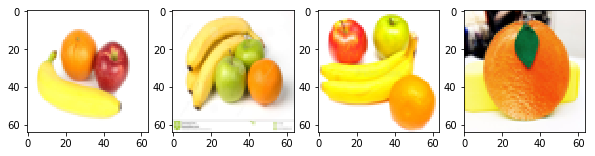

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,5))

ax[0].imshow(mixed_train[0])
ax[1].imshow(mixed_train[1])
ax[2].imshow(mixed_train[2])
ax[3].imshow(mixed_train[19])

(240, 64, 64, 3)

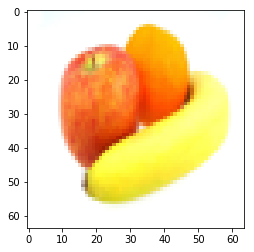

In [13]:
x_train = apple_train
x_train = np.concatenate((x_train, banana_train))
x_train = np.concatenate((x_train, orange_train))
x_train = np.concatenate((x_train, mixed_train))
#218
plt.imshow(x_train[234])
x_train.shape

In [14]:
apple_y = ([[1,0,0,0]])
a = ([[1,0,0,0]])

for i in range(0,73):
    if apple_y is None:
        apple_y = apple_y
    else:
        apple_y = np.concatenate((apple_y, a))

apple_y.shape

(74, 4)

In [15]:
banana_y = ([[0,1,0,0]])
b = ([[0,1,0,0]])

for i in range(74,147):
    if banana_y is None:
        banana_y = banana_y
    else:
        banana_y = np.concatenate((banana_y, b))

banana_y.shape

(74, 4)

In [16]:
orange_y = ([[0,0,1,0]])
c= ([[0,0,1,0]])

for i in range(147, 218):
    if orange_y is None:
        orange_y = orange_y
    else:
        orange_y = np.concatenate((orange_y, c))

orange_y.shape

(72, 4)

In [17]:
mixed_y = ([[0,0,0,1]])
d = ([[0,0,0,1]])
for i in range(219, 238):
    if mixed_y is None:
        mixed_y = mixed_y
    else:
        mixed_y = np.concatenate((mixed_y, d))
        
mixed_y.shape


(20, 4)

In [18]:
y_train = apple_y
y_train = np.concatenate((y_train, banana_y))
y_train = np.concatenate((y_train, orange_y))
y_train = np.concatenate((y_train, mixed_y))

y_train.shape

(240, 4)

(240, 4)
(240, 64, 64, 3)
(240, 4)


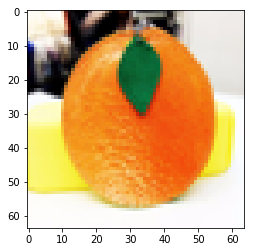

In [19]:
print(y_train.shape)
print(x_train.shape)
print(y_train.shape)
plt.imshow(x_train[239])

In [67]:
!pip install tensorflow --upgrade
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu
!pip install tf-nightly

Tried Max Pooling - 0.8167, Average Pooling - 0.7833 and Global (Max - 0.8167% and Average - 0.8000) Pooling on an epochs pf 100. Increasing dropout, rate to 0.5 and increasing units to 512 increased accuracy to 0.83%.

In [68]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import InputLayer
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, Dropout

ImportError: cannot import name 'get_config'

In [171]:
def cnn_model():
    model= tf.keras.Sequential()
    model.add(InputLayer(input_shape=(size, size, 3)))

    model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', padding='same', input_shape=(size,size,3)))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
    
#     model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', input_shape=(size,size,3)))
#     model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
#     model.add(tf.keras.layers.Dropout(rate=0.25))
    
    model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
    model.add(tf.keras.layers.Dropout(rate=0.25))
    
    model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation='relu', padding='same'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
    model.add(tf.keras.layers.Dropout(rate=0.5))
    
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=512, activation='relu'))
    model.add(tf.keras.layers.Dropout(rate=0.5))


    model.add(tf.keras.layers.Dense(units=4, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) 
    
    return model

In [172]:
model = cnn_model()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 63, 63, 64)        18496     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 62, 62, 32)        18464     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 61, 61, 32)      

In [175]:
model3 = cnn_model()
his = model3.fit(train_data, epochs=20, validation_data=test_data)

Epoch 1/20
8/8 [==============================] - 10s 1s/step - loss: 3.1016 - accuracy: 0.3333 - val_loss: 1.4855 - val_accuracy: 0.3167
Epoch 2/20
8/8 [==============================] - 8s 1s/step - loss: 1.6471 - accuracy: 0.3625 - val_loss: 1.3562 - val_accuracy: 0.3000
Epoch 3/20
8/8 [==============================] - 9s 1s/step - loss: 1.3687 - accuracy: 0.3417 - val_loss: 1.2944 - val_accuracy: 0.6167
Epoch 4/20
8/8 [==============================] - 9s 1s/step - loss: 1.2150 - accuracy: 0.4667 - val_loss: 1.2656 - val_accuracy: 0.7000
Epoch 5/20
8/8 [==============================] - 8s 1s/step - loss: 1.1691 - accuracy: 0.5042 - val_loss: 1.2149 - val_accuracy: 0.5833
Epoch 6/20
8/8 [==============================] - 9s 1s/step - loss: 1.0256 - accuracy: 0.6333 - val_loss: 1.1242 - val_accuracy: 0.7667
Epoch 7/20
8/8 [==============================] - 8s 1s/step - loss: 0.9194 - accuracy: 0.7292 - val_loss: 1.0205 - val_accuracy: 0.7833
Epoch 8/20
8/8 [========================

In [249]:
xx =[]
yy=[]
for x, y in train_data:
    xx.append(x)
    yy.append(y)

xx1=[]
yy1=[]

for x1, y1 in test_data:
    xx1.append(x1)
    yy1.append(y1)

yy = np.array(yy)
yy

yy1 = np.array(yy1)
yy1

/Users/joshualeow/anaconda3/envs/PythonEx/lib/python3.6/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/Users/joshualeow/anaconda3/envs/PythonEx/lib/python3.6/site-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


array([<tf.Tensor: shape=(32, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]], dtype=float32)>,
       <tf.Tensor: shape=(28, 4), dtype=float32, numpy=
array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 

In [251]:
aug = ImageDataGenerator(shear_range=0.1, featurewise_center=False, vertical_flip=True, featurewise_std_normalization=True, horizontal_flip=True, height_shift_range=0.1, width_shift_range=0.1, zoom_range=0.2, rotation_range=90, rescale=1./ 255, fill_mode='reflect')

#samplewise_center=False, zca_whitening=True, 

hist2 = aug_model.fit_generator(aug.flow(xx, yy, batch_size=(2)), steps_per_epoch=20, epochs = 50, validation_data = (xx1, yy1))#, validation_data=y_test)

#x_batch = aug.flow(x_train,y=y_train, batch_size=1)

ValueError: `x` (images tensor) and `y` (labels) should have the same length. Found: x.shape = (32, 64, 64, 3), y.shape = (8,)

In [ ]:
image_gen_flip = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
train_data_gen = image_gen_flip.flow_from_directory(batch_size=32,
                                                    directory="train_aug",
                                                    shuffle=True,
                                                    target_size=(size, size))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotimages(augmented_images)

In [83]:

#accuracy with highest probability is considered as selected class


#validation_data=y_test, validation_steps=50, verbose=2

hist = model.fit(x_train/255, y=y_train, validation_data=(x_test, y_test), epochs=60, batch_size=64)
#18

Epoch 1/60
4/4 [==============================] - 5s 1s/step - loss: 4.8723 - accuracy: 0.2958 - val_loss: 2.0431 - val_accuracy: 0.3167
Epoch 2/60
4/4 [==============================] - 5s 1s/step - loss: 3.4632 - accuracy: 0.3000 - val_loss: 1.4841 - val_accuracy: 0.3833
Epoch 3/60
4/4 [==============================] - 6s 2s/step - loss: 1.6824 - accuracy: 0.3042 - val_loss: 1.4137 - val_accuracy: 0.3000
Epoch 4/60
4/4 [==============================] - 7s 2s/step - loss: 1.5813 - accuracy: 0.3375 - val_loss: 1.2690 - val_accuracy: 0.3500
Epoch 5/60
4/4 [==============================] - 8s 2s/step - loss: 1.4029 - accuracy: 0.3625 - val_loss: 1.2680 - val_accuracy: 0.5667
Epoch 6/60
4/4 [==============================] - 7s 2s/step - loss: 1.2171 - accuracy: 0.4708 - val_loss: 1.2652 - val_accuracy: 0.3500
Epoch 7/60
4/4 [==============================] - 7s 2s/step - loss: 1.1862 - accuracy: 0.4500 - val_loss: 1.2598 - val_accuracy: 0.4667
Epoch 8/60
4/4 [=========================

<h3>Image Augmentation</h3>

In [84]:

aug_model = cnn_model()
#aug_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy']) 


In [85]:


aug = ImageDataGenerator(shear_range=0.1, featurewise_center=False, vertical_flip=True, featurewise_std_normalization=True, horizontal_flip=True, height_shift_range=0.1, width_shift_range=0.1, zoom_range=0.2, rotation_range=90, rescale=1./ 255, fill_mode='reflect')

#samplewise_center=False, zca_whitening=True, 

hist2 = aug_model.fit_generator(aug.flow(x_train, y_train, batch_size=(2)), steps_per_epoch=20, epochs = 50, validation_data = (x_test, y_test))#, validation_data=y_test)

#x_batch = aug.flow(x_train,y=y_train, batch_size=1)

Epoch 1/50
20/20 [==============================] - 10s 515ms/step - loss: 2.5894 - accuracy: 0.0750 - val_loss: 1.3255 - val_accuracy: 0.3000
Epoch 2/50
20/20 [==============================] - 12s 610ms/step - loss: 1.6930 - accuracy: 0.4000 - val_loss: 1.3573 - val_accuracy: 0.3167
Epoch 3/50
20/20 [==============================] - 11s 570ms/step - loss: 1.3576 - accuracy: 0.4250 - val_loss: 1.3002 - val_accuracy: 0.5667
Epoch 4/50
20/20 [==============================] - 13s 648ms/step - loss: 1.2288 - accuracy: 0.3500 - val_loss: 1.2243 - val_accuracy: 0.5833
Epoch 5/50
20/20 [==============================] - 12s 581ms/step - loss: 0.8238 - accuracy: 0.6750 - val_loss: 1.0297 - val_accuracy: 0.7167
Epoch 6/50
20/20 [==============================] - 11s 528ms/step - loss: 0.6972 - accuracy: 0.6500 - val_loss: 0.9622 - val_accuracy: 0.8167
Epoch 7/50
20/20 [==============================] - 11s 526ms/step - loss: 1.0541 - accuracy: 0.6000 - val_loss: 0.9806 - val_accuracy: 0.7333

In [ ]:
##### Train model again for better accuracy
aug = ImageDataGenerator(shear_range=0.2, featurewise_center=False, vertical_flip=True, featurewise_std_normalization=True, horizontal_flip=True, height_shift_range=0.1, width_shift_range=0.1, zoom_range=0.2, rotation_range=40, rescale=1./ 255, fill_mode='reflect')

#samplewise_center=False, zca_whitening=True, 

hist2 = aug_model.fit_generator(aug.flow(x_train, y_train, batch_size=(2)), steps_per_epoch=50, epochs = 10, validation_data = (x_test, y_test))#, validation_data=y_test)

#x_batch = aug.flow(x_train,y=y_train, batch_size=1)

In [ ]:
Tried: Reflect: 83% Nearest: 81.67% Constant:0.78 Wrap: 0.78

In [ ]:
from tensorflow.keras import layers

#aug_iter = aug.flow(x_train, batch_size=1)
# aug_iter = np.array(aug_iter)
#aug_iter = aug_iter.reshape(64, 64, 3)
#item = None

# for i in range(0, 240):
#     img1 = img_to_array(aug_iter)
#     if item is None:
#         item = aug_iter[i][0:,:,:,:]
#     else:
#         item = np.concatenate((item, aug_iter[i][0:,:,:,:]))


# # # plt.imshow(aug_iter[1])
data_aug = keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomFlip(mode='vertical')])
data_aug = keras.Sequential([tf.keras.layers.experimental.preprocessing.RandomContrast(1.0,seed=None)])
data_aug = keras.Sequential([tf.keras.layers.experimental.preprocessing.CenterCrop(50,50)])

plt.imshow(data_aug(x_train)[1])
data_aug(x_train).shape

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
kf= KFold(n_splits = 5)
skf = StratifiedKFold

When training, epochs consistently gets an accuracy of 1.0000 after the epochs of 20.

<h2>Load Test Data</h2>

In [28]:
test_path = 'test'
apple_test = None

for i in range(77,96):
    apple_raw = PIL.Image.open(test_path + '/apple_{0}.jpg'.format(i))
    apple_raw = apple_raw.convert('RGB')
    apple_array = np.array(apple_raw)
            
    apple_resize = apple_raw.resize((size,size))
        

        
    if apple_test is None:
        apple_test = apple_resize
    else:
        apple_test = np.concatenate((apple_test, apple_resize))

apple_test = apple_test.reshape(-1, size, size, 3)

apple_test.shape


(19, 64, 64, 3)

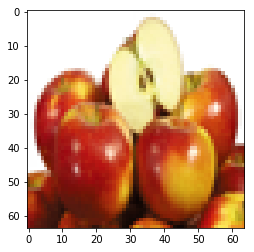

In [29]:
plt.imshow(apple_test[18])

In [30]:
banana_test = None

for i in range(77,95):
    banana_raw = PIL.Image.open(test_path + '/banana_{0}.jpg'.format(i))
    banana_raw = banana_raw.convert('RGB')
    banana_array = np.array(banana_raw)
            
    banana_resize = banana_raw.resize((size,size))
        

        
    if banana_test is None:
        banana_test = banana_resize
    else:
        banana_test = np.concatenate((banana_test, banana_resize))

banana_test = banana_test.reshape(-1, size, size, 3)

banana_test.shape

(18, 64, 64, 3)

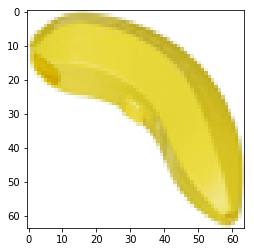

In [31]:
plt.imshow(banana_test[17])

In [32]:

orange_test = None

for i in range(77,96):
    if i == 88:
        continue
    else:
        orange_raw = PIL.Image.open(test_path + '/orange_{0}.jpg'.format(i))
        orange_raw = orange_raw.convert('RGB')
        orange_array = np.array(orange_raw)
            
        orange_resize = orange_raw.resize((size,size))
        

        
        if orange_test is None:
            orange_test = orange_resize
        else:
            orange_test = np.concatenate((orange_test, orange_resize))

orange_test = orange_test.reshape(-1, size, size, 3)

orange_test.shape

(18, 64, 64, 3)

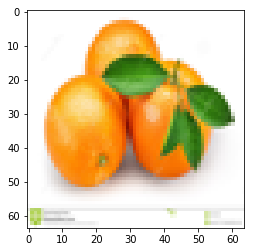

In [33]:
plt.imshow(orange_test[4])

In [34]:
mixed_test = None

for i in range(21,26):
    mixed_raw = PIL.Image.open(test_path + '/mixed_{0}.jpg'.format(i))
    mixed_raw = mixed_raw.convert('RGB')
    mixed_array = np.array(mixed_raw)
            
    mixed_resize = mixed_raw.resize((size, size))
        

        
    if mixed_test is None:
        mixed_test = mixed_resize
    else:
        mixed_test = np.concatenate((mixed_test, mixed_resize))

mixed_test = mixed_test.reshape(-1, size, size, 3)

mixed_test.shape



(5, 64, 64, 3)

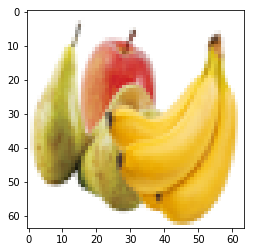

In [35]:
plt.imshow(mixed_test[3])

In [36]:
x_test = apple_test
x_test = np.concatenate((x_test, banana_test))
x_test = np.concatenate((x_test, orange_test))
x_test = np.concatenate((x_test, mixed_test))


x_test = x_test/255
#plt.imshow(x_test[19])
x_test.shape

(60, 64, 64, 3)

In [37]:
apple_test = ([[1,0,0,0]])
a = ([[1,0,0,0]])

for i in range(77,96-1):
    if apple_test is None:
        apple_test = apple_test
    else:
        apple_test = np.concatenate((apple_test, a))

apple_test.shape

(19, 4)

In [38]:
banana_test = ([[0,1,0,0]])
b = ([[0,1,0,0]])

for i in range(77,95-1):
    if banana_test is None:
        banana_test = banana_test
    else:
        banana_test = np.concatenate((banana_test, b))

banana_test.shape

(18, 4)

In [39]:

orange_test = ([[0,0,1,0]])
c = ([[0,0,1,0]])

for i in range(77, 95-1):
    if orange_test is None:
        orange_test = mixed_test
    else:
        orange_test = np.concatenate((orange_test, c))

orange_test.shape

(18, 4)

In [40]:
mixed_test = ([[0,0,0,1]])
d = ([[0,0,0,1]])

for i in range(21, 26-1):
    if mixed_test is None:
        mixed_test = mixed_test
    else:
        mixed_test = np.concatenate((mixed_test, d))

mixed_test.shape

(5, 4)

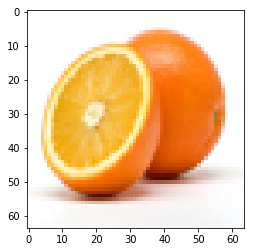

In [41]:
plt.imshow(x_test[44])

In [42]:
y_test = apple_test
y_test = np.concatenate((y_test, banana_test))
y_test = np.concatenate((y_test, mixed_test))
y_test = np.concatenate((y_test, orange_test))

y_test.shape
y_test[44]

array([0, 0, 1, 0])

It can be seen here that the accuracy is at 21% at an epochs of 18, this could be caused by overfitting shown in the ax[1] plot below. When epochs is increased to 100, 

In [ ]:
loss, accuracy = aug_model.evaluate(x=x_test, y=y_test)

print('loss =', loss)
print('accuracy =', accuracy)

As seen in the plots below, accuracy peaks at about 20 epochs. Looking at the disparity between the accuracy on the training data at 100% and the test data at 38%.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

ax[0].plot(hist.history['loss'])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Loss Curve')

ax[1].plot(hist.history['accuracy'])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Accuracy Curve')

plt.show()